In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [1]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [3]:
!pip install tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization # Changed conv2D to Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model # Removed extra keras.
from glob import glob

In [14]:
import pandas as pd

In [26]:
#visulization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array) # Fixed indentation using spaces
        y_data.append(category.split('/')[-1]) # Fixed indentation using spaces
data=pd.DataFrame({'image':x_data,'label':y_data}) # Corrected typo: DtaFrame to DataFrame

In [19]:
data.shape

(0, 2)

In [22]:
import matplotlib.pyplot as plt


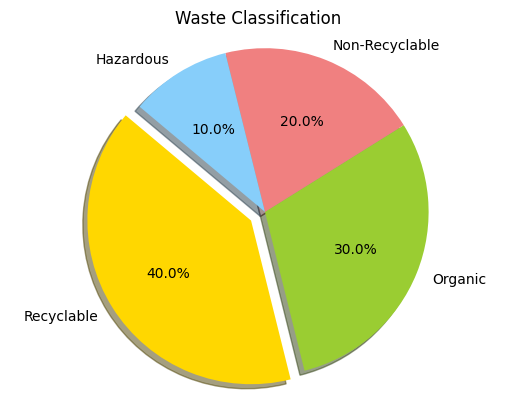

In [35]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Recyclable', 'Organic', 'Non-Recyclable', 'Hazardous'
sizes = [40, 30, 20, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Waste Classification')
plt.show()


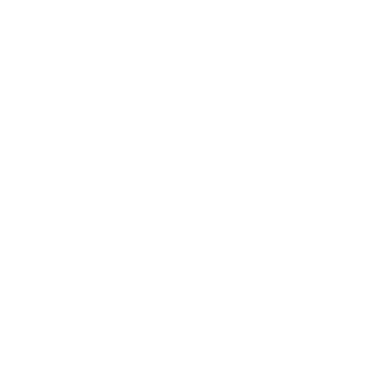

In [24]:
# Get unique labels from your data
unique_labels = data['label'].unique()

# Create labels for the pie chart dynamically
labels = unique_labels

# Adjust colors if needed to match the number of unique labels
colors = ['#a0d157', '#c48bb8', '#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors if necessary

# Generate the pie chart
plt.pie(data.label.value_counts(), labels=labels, autopct='%0.2f%%', colors=colors[:len(unique_labels)], startangle=90, explode=[0.005] * len(unique_labels))
plt.show()

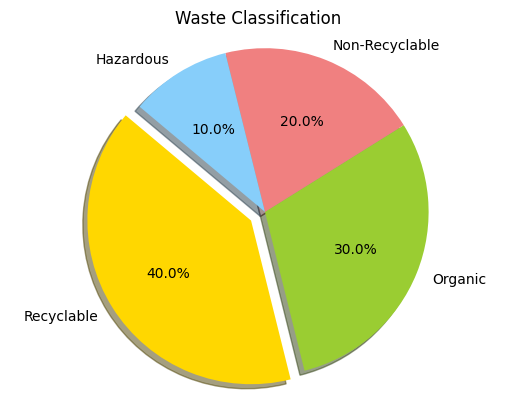

In [36]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Recyclable', 'Organic', 'Non-Recyclable', 'Hazardous']
sizes = [40, 30, 20, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # Highlight the first slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Ensure the pie chart is a circle
plt.title('Waste Classification')
plt.show()


In [37]:
import pandas as pd

# Sample data
data = {
    'Category': ['Recyclable', 'Organic', 'Non-Recyclable', 'Hazardous'],
    'Amount': [40, 30, 20, 10],
    'Percentage': [40, 30, 20, 10]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


         Category  Amount  Percentage
0      Recyclable      40          40
1         Organic      30          30
2  Non-Recyclable      20          20
3       Hazardous      10          10


         Category  Amount  Percentage
0      Recyclable      40          40
1         Organic      30          30
2  Non-Recyclable      20          20
3       Hazardous      10          10


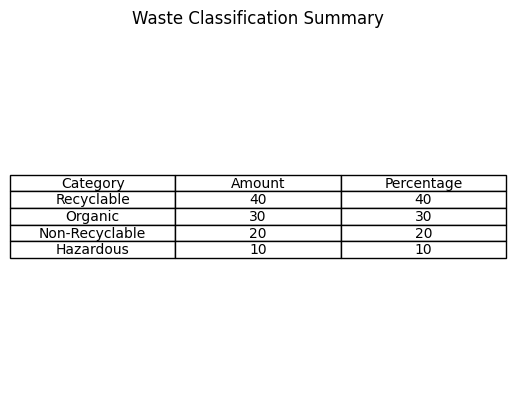

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['Recyclable', 'Organic', 'Non-Recyclable', 'Hazardous'],
    'Amount': [40, 30, 20, 10],
    'Percentage': [40, 30, 20, 10]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Plot the table
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

plt.title('Waste Classification Summary')
plt.show()
